<a href="https://colab.research.google.com/github/Carlos-G-Santos/projeto2/blob/main/C%C3%B3pia_de_EDA_termoeletricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução


Exemplo de uma análise exploratória de dados. Antes de aplicar modelos de aprendizado de máquina, é necessário conhecer os dados!

Neste exemplo, vamos trabalhar com um conjunto de dados de materiais termoelétricos. Materiais termoelétricos são aqueles que convertem energia térmica em energia elétrica, com base nos efeitos Seebeck e Peltier. Esses materiais possuem inúmeras aplicações tecnológicas como: coletores solares e sistemas de resfriamento termoelétrico.  A Teoria do Funcional da Densidade (Density Functional Theory, DFT) pode ser utilizada para descrever propriedades eletrônicas de materiais naturais ou sintéticos, além de investigar relações com propriedades físicas dos materiais, como a condutividade elétrica e a condutividade térmica. Porém, a aplicação da DFT tipicamente se limita a materiais de poucas células unitárias, devido aos altos custos computacionais. Técnicas de aprendizado de máquina podem ser utilizadas para investigar relações entre propriedades físicas de materiais, de modo a descobrir materiais que sejam mais eficientes para uma determinada aplicação tecnológica.  
Um índice muito utilizado para medir a eficiência de materiais termoelétricos na transformação de calor em energia elétrica é a figura de mérito (ZT), uma quantidade adimensional. A figura de mérito é calculada da seguinte forma:

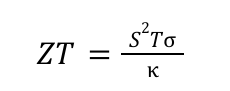


Onde S é o coeficiente de Seebeck, T é a temperatura absoluta, sigma é a condutividade elétrica e kapa é a condutividade térmica do material. Materiais termoelétricos eficientes são aqueles que apresentam ZT>1.
Base de dados: o conjunto de dados ESTM (experimentally synthesized thermoelectric materials) reúne dados experimentais de 880 materiais termoelétricos sintéticos, incluindo os seguintes atributos: composição química, coeficiente de Seebeck, condutividade elétrica, condutividade térmica, fator de poder e figura de mérito. Os dados estão disponíveis em https://github.com/KRICT-DATA/SIMD/tree/main/dataset.  
Referências:

Barua, N.K., Hall, E., Cheng, Y., Oliynyk, A.O. and Kleinke, H., 2024. Interpretable machine learning model on thermal conductivity using publicly available datasets and our internal lab dataset. Chemistry of Materials, 36(14), pp.7089-7100. https://doi.org/10.1021/acs.chemmater.4c01696

Na, G.S., Chang, H. A public database of thermoelectric materials and system-identified material representation for data-driven discovery. Comput Mater 8, 214 (2022). https://doi.org/10.1038/s41524-022-00897-2


In [1]:
# Importando as bibliotecas necessárias
import numpy as np # lidar com arrays
import pandas as pd # lidar com dataframes
import matplotlib.pyplot as plt # gráficos
import seaborn as sns # gráficos

In [2]:
# Leitura de arquivo armazenado no Google Drive
# Obs: o arquivo precisa ser compartilhado para leitura
# https://docs.google.com/spreadsheets/d/1cS9pX-TBklBQBEB3ZoFp6r27Zz-AH-ap/edit?usp=sharing&ouid=100045855553146048631&rtpof=true&sd=true
import gdown

# IDs dos arquivos no Google Drive
file = {
    'filename': 'estm.xlsx',
    'file_id': '1cS9pX-TBklBQBEB3ZoFp6r27Zz-AH-ap'
}

# Trazer o arquivo para a área de trabalho do colab
url = f"https://drive.google.com/uc?id={file['file_id']}"
print(f"Baixando {file['filename']}...")
gdown.download(url, file['filename'], quiet=False)
print(f"{file['filename']} baixado com sucesso!")

Baixando estm.xlsx...


Downloading...
From: https://drive.google.com/uc?id=1cS9pX-TBklBQBEB3ZoFp6r27Zz-AH-ap
To: /content/estm.xlsx
100%|██████████| 1.99M/1.99M [00:00<00:00, 146MB/s]

estm.xlsx baixado com sucesso!


In [3]:
# Leitura do arquivo
estm = pd.read_excel('estm.xlsx', header=1)
estm.head()

,Formula,temperature(K),seebeck_coefficient(μV/K),electrical_conductivity(S/m),thermal_conductivity(W/mK),power_factor(W/mK2),ZT,reference
0,BiSb(Se0.92Br0.08)3,300.0,-110.0,27766.0,0.63,0.000336,0.159985,10.1002/adfm.201806558
1,BiSb(Se0.92Br0.08)3,400.0,-138.0,23883.0,0.57,0.000455,0.319177,10.1002/adfm.201806558
2,BiSb(Se0.92Br0.08)3,500.0,-163.0,20850.0,0.53,0.000554,0.522607,10.1002/adfm.201806558
3,BiSb(Se0.92Br0.08)3,600.0,-181.0,19000.0,0.51,0.000622,0.732305,10.1002/adfm.201806558
4,BiSb(Se0.92Br0.08)3,700.0,-193.0,17925.0,0.50,0.000668,0.940000,10.1002/adfm.201806558


# Estatística descritiva

In [4]:
# tamanho do conjunto de dados
estm.shape

(5205, 8)

In [5]:
# nome das colunas
estm.columns

Index(['Formula', 'temperature(K)', 'seebeck_coefficient(μV/K)',
       'electrical_conductivity(S/m)', 'thermal_conductivity(W/mK)',
       'power_factor(W/mK2)', 'ZT', 'reference'],
      dtype='object')

In [6]:
# verificando o tipo de informação em cada coluna
estm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5205 entries, 0 to 5204
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Formula                       5205 non-null   object 
 1   temperature(K)                5205 non-null   float64
 2   seebeck_coefficient(μV/K)     5205 non-null   float64
 3   electrical_conductivity(S/m)  5205 non-null   float64
 4   thermal_conductivity(W/mK)    5205 non-null   float64
 5   power_factor(W/mK2)           5205 non-null   float64
 6   ZT                            5205 non-null   float64
 7   reference                     5205 non-null   object 
dtypes: float64(6), object(2)
memory usage: 325.4+ KB


In [7]:
# verificando se há valores faltantes (nan)
estm.isna().sum()

,0
Formula,0
temperature(K),0
seebeck_coefficient(μV/K),0
electrical_conductivity(S/m),0
thermal_conductivity(W/mK),0
power_factor(W/mK2),0
ZT,0
reference,0


In [8]:
# Estatística descritiva básica
estm.describe()

,temperature(K),seebeck_coefficient(μV/K),electrical_conductivity(S/m),thermal_conductivity(W/mK),power_factor(W/mK2),ZT
count,5205.000000,5205.000000,5.205000e+03,5205.000000,5205.000000,5.205000e+03
mean,539.217533,73.183879,1.095845e+05,2.250818,0.000992,3.541950e-01
std,192.422345,208.924232,1.467224e+06,3.290789,0.001123,3.475057e-01
min,10.000000,-1174.000000,4.259000e-04,0.070000,0.000000,4.603919e-10
25%,392.000000,-108.320000,7.059000e+03,0.734500,0.000241,7.808195e-02
50%,523.000000,100.690000,3.020000e+04,1.336300,0.000626,2.467954e-01
75%,673.000000,202.060000,9.179500e+04,2.694400,0.001301,5.340450e-01
max,1275.000000,1052.400000,9.464455e+07,77.160000,0.007605,2.277911e+00


Como as variáveis estão distribuídas?

Text(0.5, 1.0, 'Distribuição da Condutividade Elétrica')

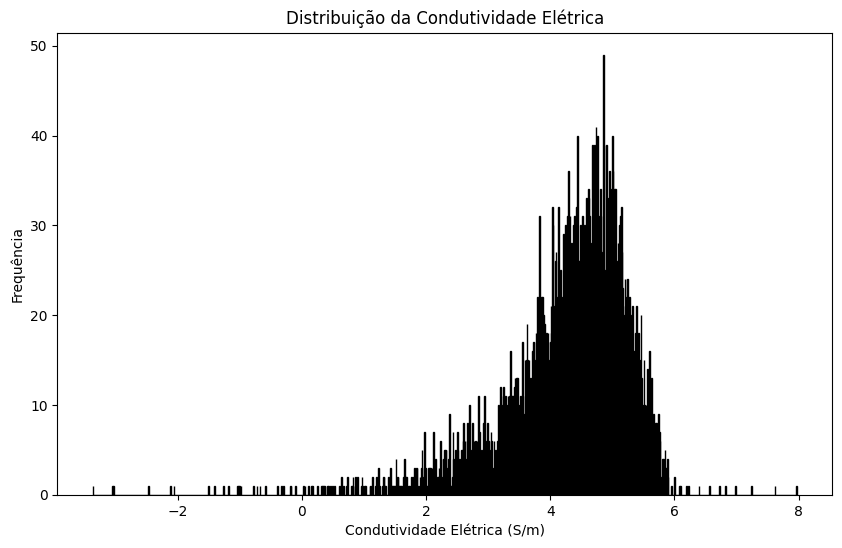

In [9]:
# electrical_conductivity(S/m)
plt.figure(figsize=(10,6))
plt.hist(np.log10(estm['electrical_conductivity(S/m)']), bins=1000, edgecolor='black')
plt.xlabel('Condutividade Elétrica (S/m)')
plt.ylabel('Frequência')
plt.title('Distribuição da Condutividade Elétrica')

Text(0.5, 1.0, 'Boxplot da Condutividade Elétrica')

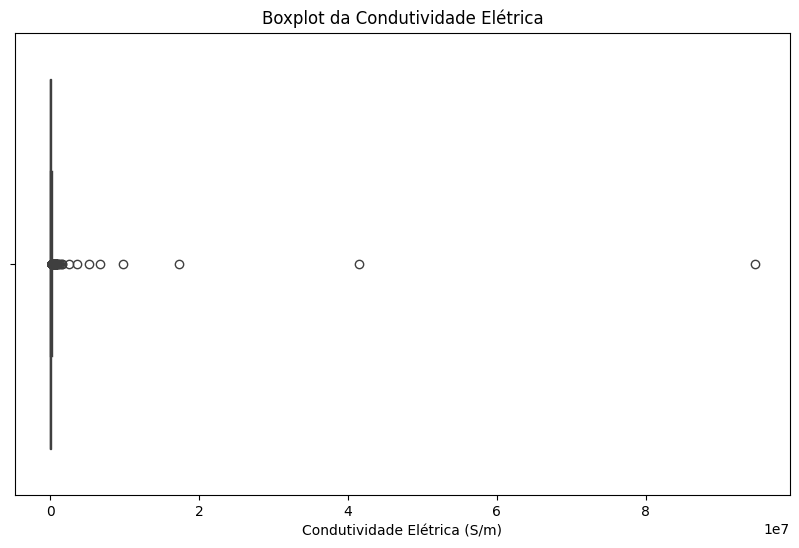

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=estm['electrical_conductivity(S/m)'])
plt.xlabel('Condutividade Elétrica (S/m)')
plt.title('Boxplot da Condutividade Elétrica')

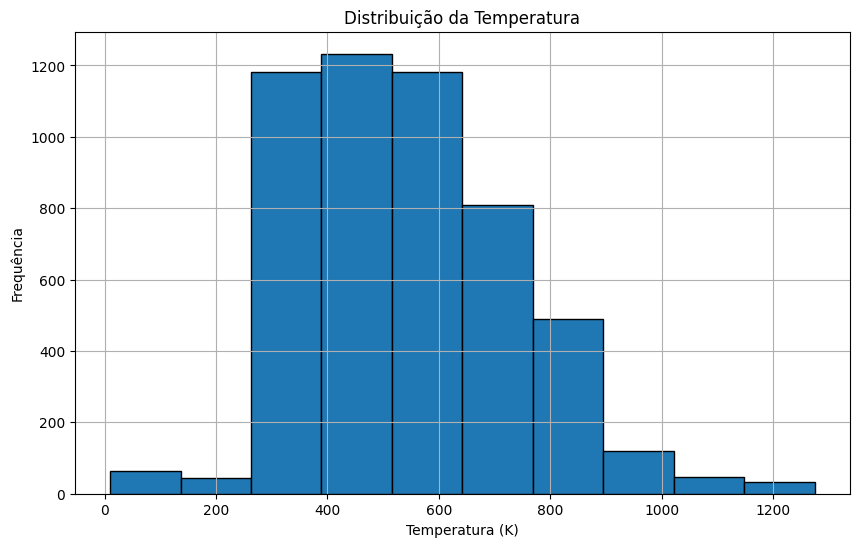

In [11]:
# Histograma
plt.figure(figsize=(10, 6))
plt.hist(estm['temperature(K)'], bins=10, edgecolor='black')
plt.xlabel('Temperatura (K)')
plt.ylabel('Frequência')
plt.title('Distribuição da Temperatura')
plt.grid(True)
plt.show()

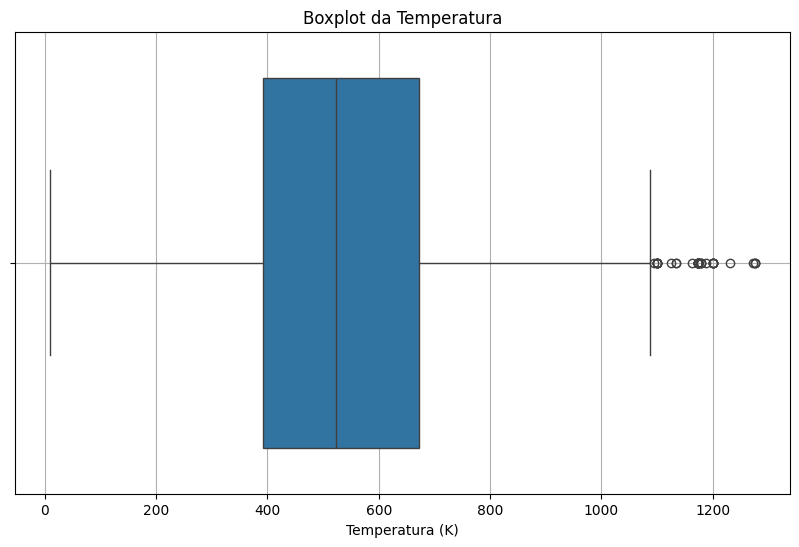

In [12]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=estm['temperature(K)'])
plt.xlabel('Temperatura (K)')
plt.title('Boxplot da Temperatura')
plt.grid(True)
plt.show()

Extra: explore os histogramas e boxplots das demais variáveis

Como explorar a distribuição de uma variável textual?

In [13]:
# Distribuição de instâncias da variável "Formula"
estm['Formula'].value_counts()

,count
Formula,
SnSe,43
SnTe,39
BiCuSeO,30
GeTe,28
Cu2Se,25
...,...
LaCo0.95Ni0.05O3,1
LaCoO3,1
LaCo0.75Ni0.25O3,1


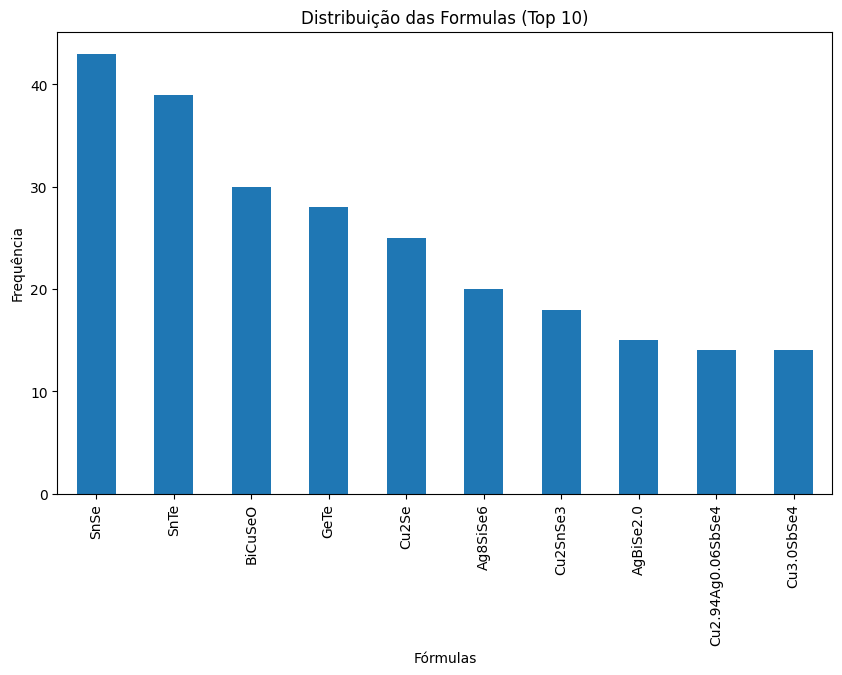

In [14]:
# 10 materiais mais frequentes
plt.figure(figsize=(10, 6))
estm['Formula'].value_counts().nlargest(10).plot(kind='bar')
plt.xlabel('Fórmulas')
plt.ylabel('Frequência')
plt.title('Distribuição das Formulas (Top 10)')
plt.show()

# Correlações

Vamos investigar se existem relações entre as variáveis. Por exemplo, podemos fazer um gráfico de dispersão (scatter plot) entre duas variáveis.

Text(0.5, 1.0, 'Relação entre Temperatura e ZT')

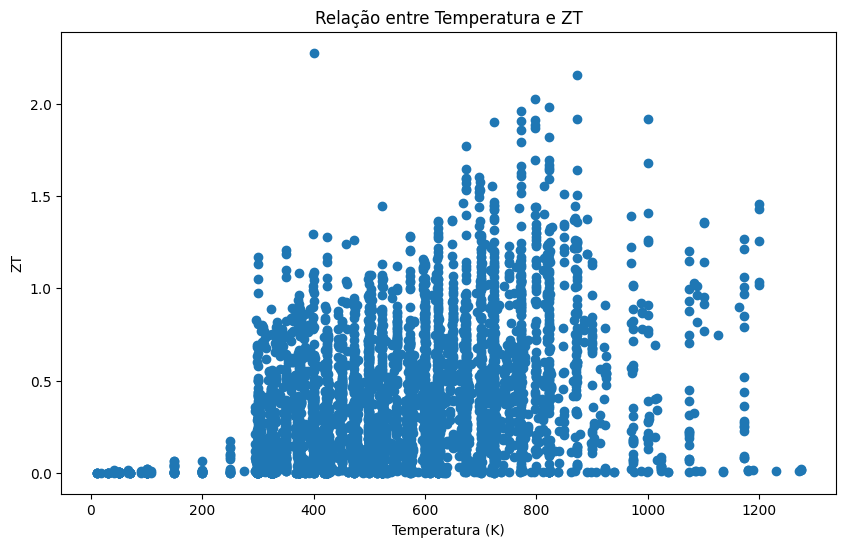

In [15]:
# Scatter plot entre ZT e temperatura
plt.figure(figsize=(10, 6))
plt.scatter(estm['temperature(K)'], estm['ZT'])
plt.xlabel('Temperatura (K)')
plt.ylabel('ZT')
plt.title('Relação entre Temperatura e ZT')

Uma forma rápida de avaliar relações entre muitas variáveis numéricas é usar um gráfico conhecido como "pairs", que tem na biblioteca seaborn.

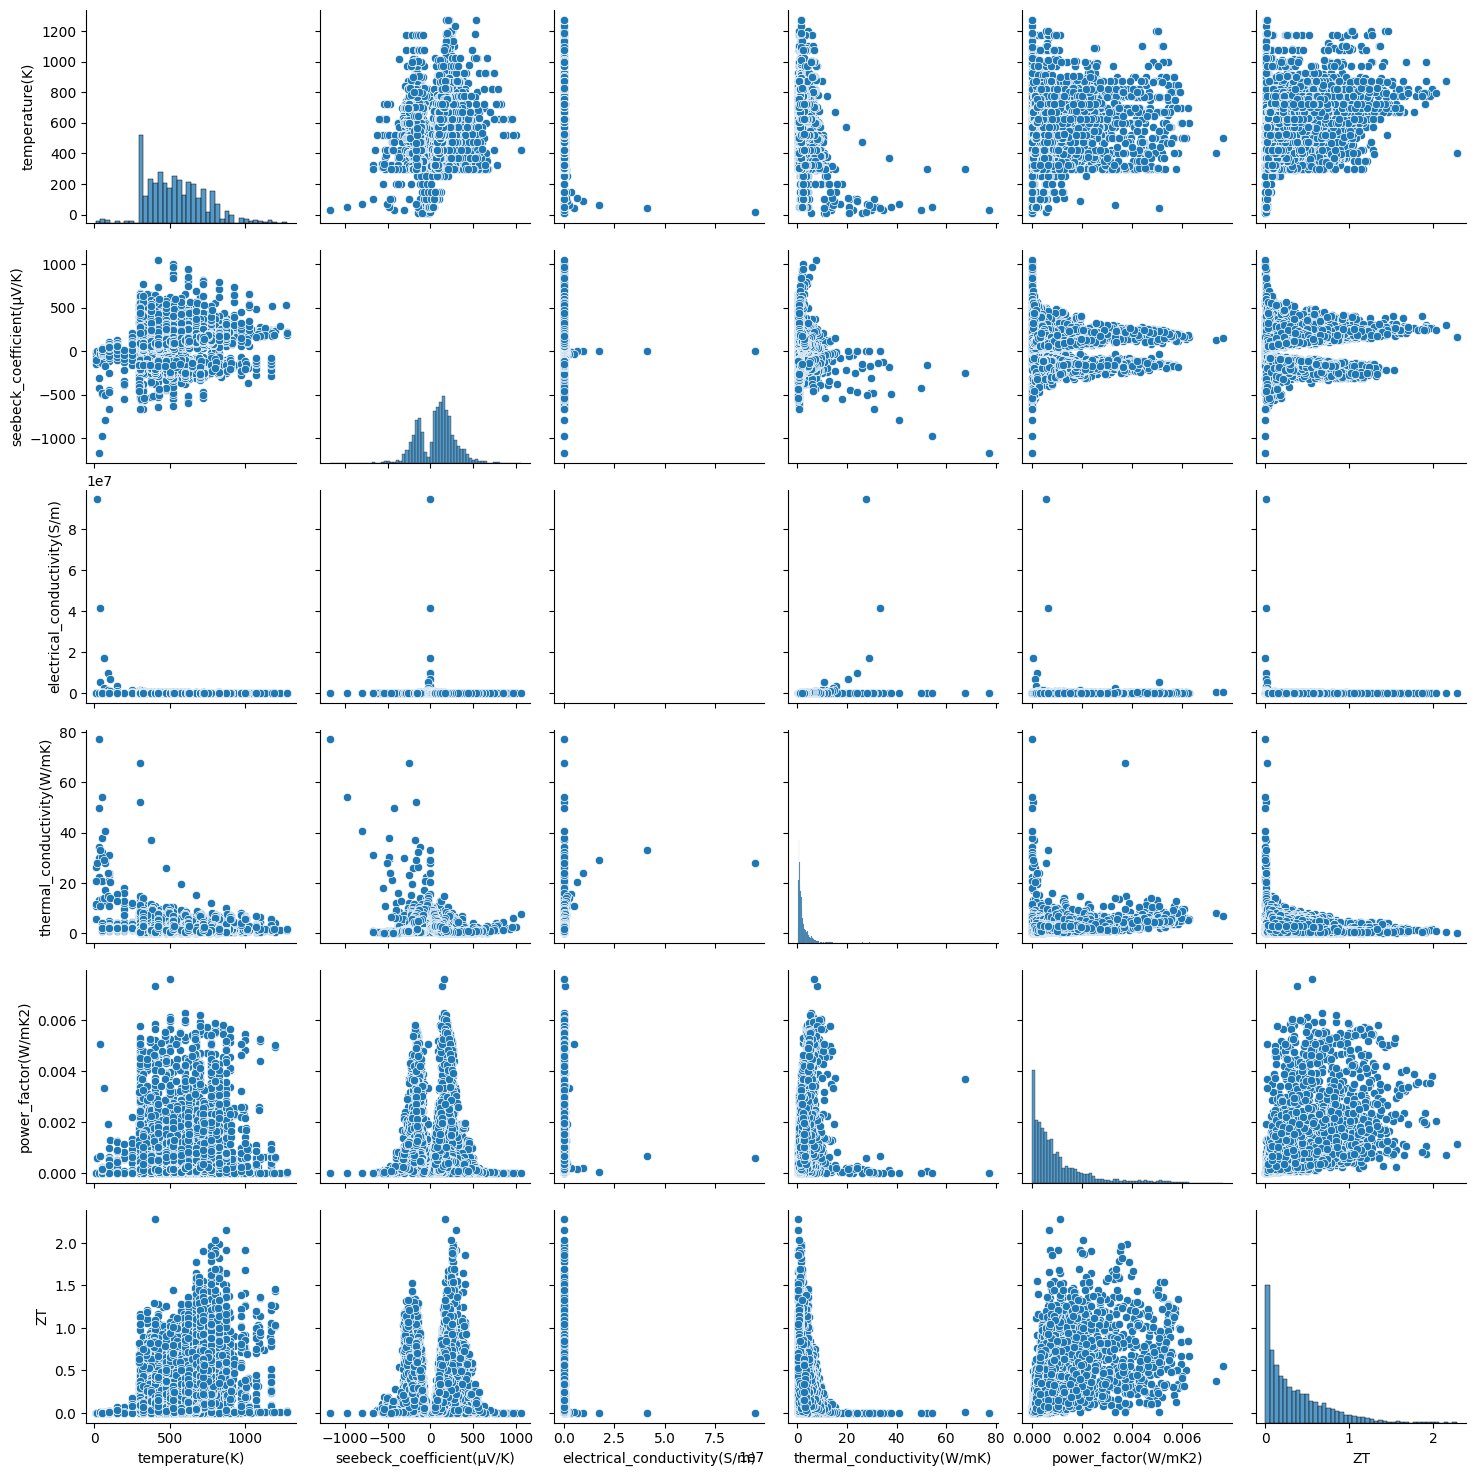

In [16]:
import seaborn as sns
sns.pairplot(estm)

Outra forma de visualizar relações de maneira compacta é fazer um heatmap da matriz de correlação entre as variáveis

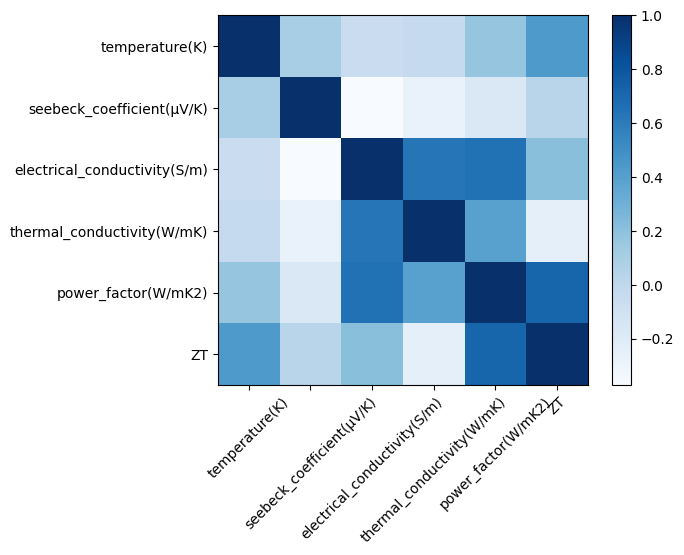

In [17]:
# Podemos usar a biblioteca matplotlib para representar a matriz e correlação em um gráfico.
# Tem outras bibliotecas que também fazem isso, como a seaborn.
# Obs: a correlação de Spearman é mais geral do que a correlação de Pearson

# Primeiro é preciso extrair apenas os valores numéricos do dataframe e calcular a matriz de correlação:
numerical_estm = estm.select_dtypes(include=np.number)
matrix = numerical_estm.corr(method='spearman')

# A função .imshow do matplotlib faz um mapa de calor
# O argumento 'cmap' define o mapa de cores. Experimente outras cores, como 'plasma' e 'cool'.
# Lista completa de mapa de cores:
# https://matplotlib.org/stable/users/explain/colors/colormaps.html
plt.imshow(matrix, cmap = 'Blues')

# adiciona barra de cores ao lado do gráfico
plt.colorbar()

# Set ticks and labels
plt.xticks(range(len(matrix.columns)), matrix.columns, rotation=45)
plt.yticks(range(len(matrix.columns)), matrix.columns)

plt.show()

Extra 1: Vimos que a condutividade elétrica assume uma ampla faixa de valores (várias ordens de grandeza). Verifique se a correlação entre condutividade elétrica e ZT melhora se a variável for transformada por uma função logarítmica.

In [19]:
log = np.log10(estm['electrical_conductivity(S/m)'])
log.head()

,electrical_conductivity(S/m)
0,4.443513
1,4.378089
2,4.319106
3,4.278754
4,4.253459


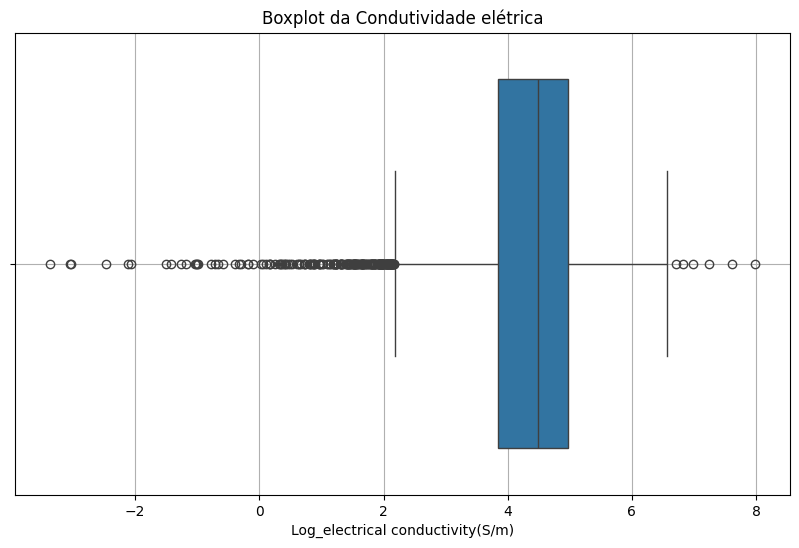

In [22]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=log)
plt.xlabel('Log_electrical conductivity(S/m)')
plt.title('Boxplot da Condutividade elétrica')
plt.grid(True)
plt.show()

In [24]:
estm['log_electrical_conductivity(S/m)'] = log # add log nos dados
estm.head()

,Formula,temperature(K),seebeck_coefficient(μV/K),electrical_conductivity(S/m),thermal_conductivity(W/mK),power_factor(W/mK2),ZT,reference,log_electrical_conductivity(S/m)
0,BiSb(Se0.92Br0.08)3,300.0,-110.0,27766.0,0.63,0.000336,0.159985,10.1002/adfm.201806558,4.443513
1,BiSb(Se0.92Br0.08)3,400.0,-138.0,23883.0,0.57,0.000455,0.319177,10.1002/adfm.201806558,4.378089
2,BiSb(Se0.92Br0.08)3,500.0,-163.0,20850.0,0.53,0.000554,0.522607,10.1002/adfm.201806558,4.319106
3,BiSb(Se0.92Br0.08)3,600.0,-181.0,19000.0,0.51,0.000622,0.732305,10.1002/adfm.201806558,4.278754
4,BiSb(Se0.92Br0.08)3,700.0,-193.0,17925.0,0.50,0.000668,0.940000,10.1002/adfm.201806558,4.253459


In [30]:
# sns.pairplot(estm)

Matriz covariância com log

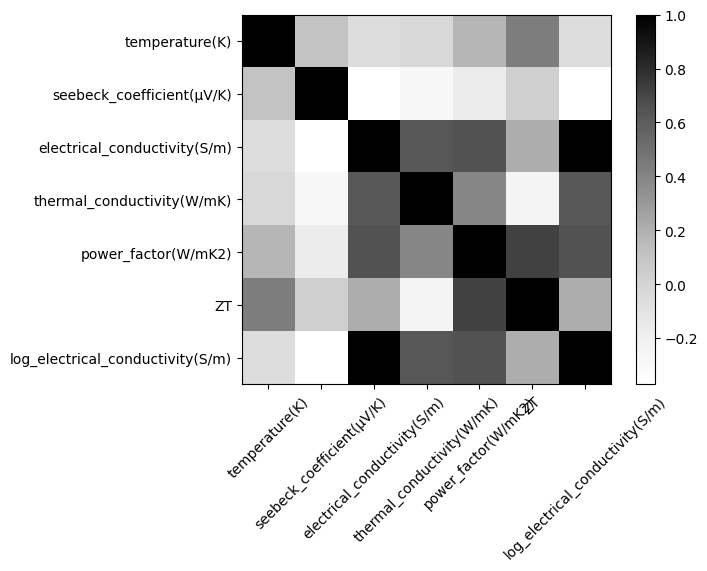

In [28]:
# Podemos usar a biblioteca matplotlib para representar a matriz e correlação em um gráfico.
# Tem outras bibliotecas que também fazem isso, como a seaborn.
# Obs: a correlação de Spearman é mais geral do que a correlação de Pearson

# Primeiro é preciso extrair apenas os valores numéricos do dataframe e calcular a matriz de correlação:
numerical_estm = estm.select_dtypes(include=np.number)
matrix = numerical_estm.corr(method='spearman')

# A função .imshow do matplotlib faz um mapa de calor
# O argumento 'cmap' define o mapa de cores. Experimente outras cores, como 'plasma' e 'cool'.
# Lista completa de mapa de cores:
# https://matplotlib.org/stable/users/explain/colors/colormaps.html
plt.imshow(matrix, cmap = 'Grays')

# adiciona barra de cores ao lado do gráfico
plt.colorbar()

# Set ticks and labels
plt.xticks(range(len(matrix.columns)), matrix.columns, rotation=45)
plt.yticks(range(len(matrix.columns)), matrix.columns)

plt.show()

Extra 2: Materiais termoelétricos eficientes são aqueles que apresentam ZT>1.
*   Quantos materiais possuem ZT>1?
*   Quais são as fórmulas desses materiais?
*   Quais são as principais características desses materiais?



In [45]:
zt_maior_1_df = estm[estm['ZT'] > 1]

print(f"Existem {len(zt_maior_1_df)} materiais com ZT>1")
print("Primeiros 5 materiais com ZT > 1:")
zt_maior_1_df.head()

Existem 318 materiais com ZT>1
Primeiros 5 materiais com ZT > 1:


,Formula,temperature(K),seebeck_coefficient(μV/K),electrical_conductivity(S/m),thermal_conductivity(W/mK),power_factor(W/mK2),ZT,reference,log_electrical_conductivity(S/m)
5,BiSb(Se0.92Br0.08)3,800.0,-203.0,17340.0,0.440,0.000715,1.299207,10.1002/adfm.201806558,4.239049
11,BiSb(Se0.94Br0.06)3,800.0,-219.0,15479.0,0.440,0.000742,1.349797,10.1002/adfm.201806558,4.189743
17,BiSb(Se0.96Br0.04)3,800.0,-228.0,12500.0,0.450,0.000650,1.155200,10.1002/adfm.201806558,4.096910
23,BiSb(Se0.98Br0.02)3,800.0,-229.0,12128.0,0.480,0.000636,1.060007,10.1002/adfm.201806558,4.083789
61,In4Se2.32Cl0.03,698.0,-311.0,10860.0,0.705,0.001050,1.039961,10.1002/adma.201004739,4.035830
